Now that we now how classical FT works, we can switch to QFT. Doing operations with qubits requires embedding of the data to the qubits. There are several ways this can be done. Here, for simplicity we will use amplitude encoding to embed 4 element array into 2 qubits. 

When we begin an operation on a QC, all of our qubits are set to the state $|0>$. Then, we can use the Ry rotation gate to alter the state to have the coefficients we want. Let's show this with a single qubit example by embedding the array $x=[2,4]$ into a single qubit.

First, we normalize the array;
$$ x = \frac{[2,4]}{\sqrt{2^2 + 4^2}} = [0.45, 0.90] $$

Then, we need to obtain the angle that we can use to obtain this state in the following form;

$$ |x> = cos(\theta/2)|0> + sin(\theta/2)|1>   $$

Clearly,

$$ tan(\theta/2) = \frac{0.90}{0.45} $$

Then we obtain;

$$ \theta \simeq 2.21 $$


In [8]:
import numpy as np
from qiskit import *

In [21]:
x = np.array([2,4])
norm = np.sqrt(sum(x*x))
x = x / norm
theta = 2 * np.arctan(x[1]/x[0])
print('Rotation angle is: %.2f' %theta)

Rotation angle is: 2.21


Measured: 0, with Probability = 0.20 
Measured: 1, with Probability = 0.80 


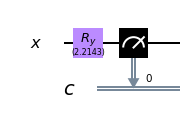

In [28]:
backend = Aer.get_backend('qasm_simulator')
q = QuantumRegister(1,'x')
c = ClassicalRegister(1,'c')
circuit = QuantumCircuit(q, c)

circuit.ry(theta,q)
circuit.measure(q, c)
shots = 1000
job = execute(circuit,backend,shots=shots)
counts = job.result().get_counts(circuit)
for keys in counts:
    print('Measured: %s, with Probability = %.2f ' %(keys,counts[keys]/shots))
circuit.draw(output='mpl')

What we mesaure is the prob.s therefore the squares of the encodings such that;
$$(x[0])^2=P(0)$$
$$(x[1])^2=P(1)$$

In [27]:
meas = [counts['0']/shots,counts['1']/shots]
output = norm * np.sqrt(meas)
print('Reconstructed input: ' + str(output))

Reconstructed input: [2.02977831 3.98497177]
